In [25]:
from test import test
from crypto_env_module import CryptoEnv
TICKER_LIST = ['BTCUSDT']

TEST_START_DATE = '2021-01-21'
TEST_END_DATE = '2021-03-30'

# INDICATORS = ['macd', 'rsi', 'cci', 'dx'] #self-defined technical indicator list is NOT supported yet
INDICATORS = [
    "macd",
    "boll_ub",
    "boll_lb",
    "rsi_30",
    "cci_30",
    "dx_30",
    "close_30_sma",
    "close_60_sma",
]
acc = test(start_date = TEST_START_DATE, 
                        end_date = TEST_END_DATE,
                        ticker_list = TICKER_LIST, 
                        data_source = 'binance',
                        time_interval= '15m', 
                        technical_indicator_list= INDICATORS,
                        drl_lib='stable_baselines3', 
                        env=CryptoEnv, 
                        model_name='ppo', 
                        current_working_dir='./models', 
                        net_dimension = 1024, 
                        if_vix=False
                        )


binance successfully connected
Using cached file ./cache/BTCUSDT_binance_2021-01-21_2021-03-30_15m.pickle
tech_indicator_list:  ['macd', 'boll_ub', 'boll_lb', 'rsi_30', 'cci_30', 'dx_30', 'close_30_sma', 'close_60_sma']
indicator:  macd
indicator:  boll_ub
indicator:  boll_lb
indicator:  rsi_30
indicator:  cci_30
indicator:  dx_30
indicator:  close_30_sma
indicator:  close_60_sma
Succesfully add technical indicators
Successfully transformed into array
[35250.61]
Successfully load model ./models/ppo.zip
self.cash = 934438.1469067809
self.stocks = [0.]
self.total_asset = 934438.1469067809
reward = 0.0008980211808971794
self.episode_return = 0.9344381469067808
episode_return 0.9344381469067808
Test Finished!


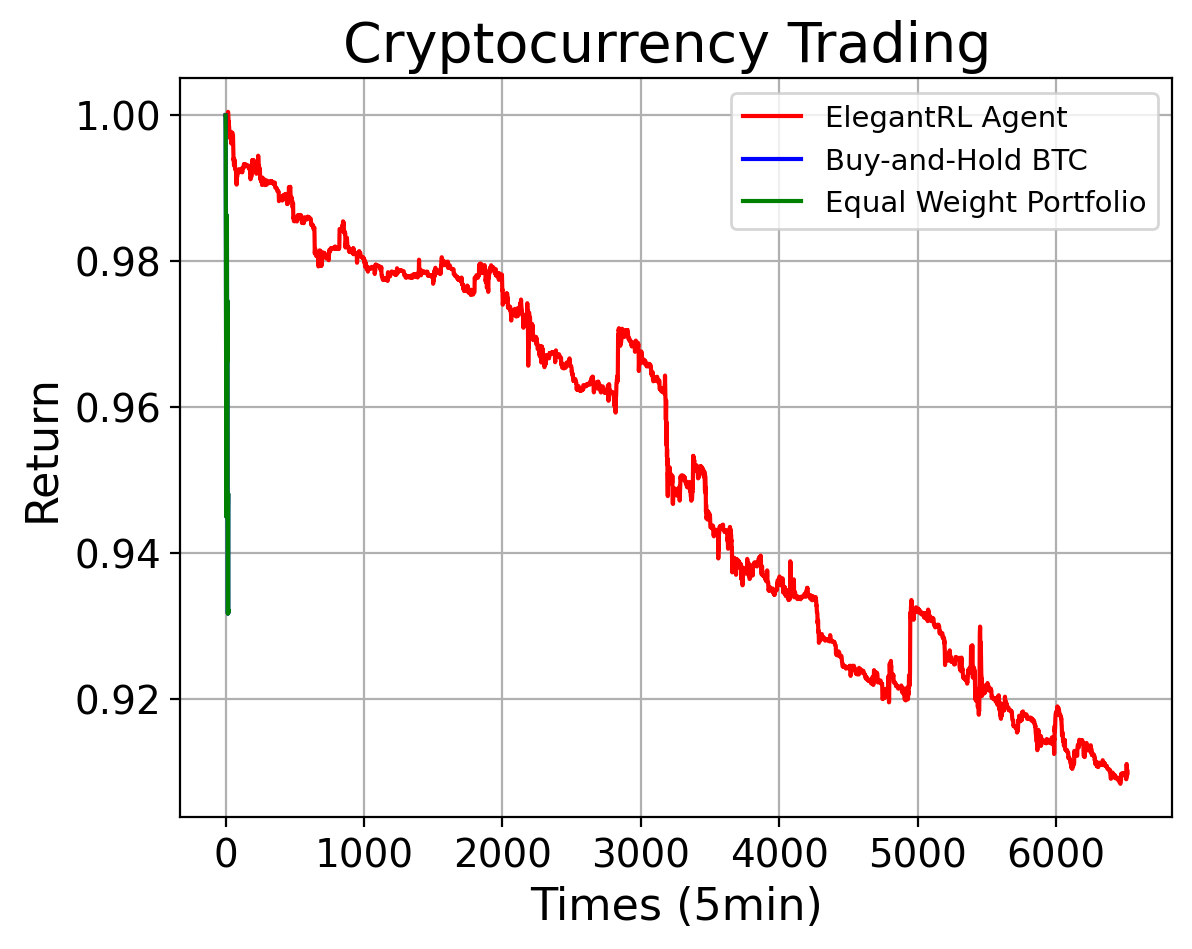

In [5]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.dates as mdates
import numpy as np
%matplotlib inline
#calculate agent return

account_value_erl = np.array(acc)
agent_returns = account_value_erl/account_value_erl[0]

#calculate buy-and-hold btc returns
price_array = np.load('./price_array.npy')
btc_prices = price_array[:,0]
buy_hold_btc_returns = btc_prices/btc_prices[0]

#calculate equal weight portfolio returns
price_array = np.load('./price_array.npy')
initial_prices = price_array[0,:]
equal_weight = np.array([1e5/initial_prices[i] for i in range(len(TICKER_LIST))])
equal_weight_values = []
for i in range(0, price_array.shape[0]):
    equal_weight_values.append(np.sum(equal_weight * price_array[i]))
equal_weight_values = np.array(equal_weight_values)
equal_returns = equal_weight_values/equal_weight_values[0]
#plot 
plt.figure(dpi=200)
plt.grid()
plt.grid(which='minor', axis='y')
plt.title('Cryptocurrency Trading ', fontsize=20)
plt.plot(agent_returns, label='StableBaseline Agent', color = 'red')
plt.plot(buy_hold_btc_returns, label='Buy-and-Hold BTC', color='blue')
plt.plot(equal_returns, label='Equal Weight Portfolio', color='green')
plt.ylabel('Return', fontsize=16)
plt.xlabel('Times (5min)', fontsize=16)
plt.xticks(size=14)
plt.yticks(size=14)
'''ax = plt.gca()
ax.xaxis.set_major_locator(ticker.MultipleLocator(210))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(21))
ax.yaxis.set_minor_locator(ticker.MultipleLocator(0.005))
ax.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1, decimals=2))
ax.xaxis.set_major_formatter(ticker.FixedFormatter([]))'''
plt.legend(fontsize=10.5)

In [35]:
from plot import backtest_stats,backtest_plot
import pandas as pd

df = pd.DataFrame(acc,columns=['account_value'])
df.head()
# backtest_stats(acc)

,account_value
0,1.000000e+06
1,1.000000e+06
2,9.999739e+05
3,1.000123e+06
4,1.000112e+06


In [26]:
import pandas as pd
df2 = pd.read_csv('data/dataset.csv')

In [27]:
df2['time'] = pd.to_datetime(df2['time']) 

In [28]:
mask = (df2['time'] > '2021-01-21') & (df2['time'] <= '2021-03-30')

In [36]:
df3 = df2.loc[mask]
df3

,time,open,high,low,close,volume,adjusted_close,tic
106675,2021-01-21 00:15:00,34863.52,35266.72,34845.51,35250.61,719.096973,35250.61,BTCUSDT
106676,2021-01-21 00:30:00,35250.39,35261.96,35056.66,35090.64,696.371722,35090.64,BTCUSDT
106677,2021-01-21 00:45:00,35081.78,35157.51,34955.42,35001.89,486.452395,35001.89,BTCUSDT
106678,2021-01-21 01:00:00,35001.88,35250.00,34851.23,35236.58,720.240077,35236.58,BTCUSDT
106679,2021-01-21 01:15:00,35236.57,35311.00,35121.15,35197.12,717.889571,35197.12,BTCUSDT
...,...,...,...,...,...,...,...,...
113187,2021-03-29 23:00:00,57953.62,58093.66,57837.83,57850.01,603.314052,57850.01,BTCUSDT
113188,2021-03-29 23:15:00,57850.01,58019.13,57777.00,57924.69,500.042863,57924.69,BTCUSDT
113189,2021-03-29 23:30:00,57924.69,58021.19,57561.22,57742.52,794.794309,57742.52,BTCUSDT
113190,2021-03-29 23:45:00,57742.53,57931.35,57632.87,57843.00,596.894230,57843.00,BTCUSDT


In [46]:
df3 = df3.reset_index()
df3['account_value'] = pd.DataFrame(acc)

In [47]:
df3

,index,date,open,high,low,close,volume,adjusted_close,tic,account_value
0,106675,2021-01-21 00:15:00,34863.52,35266.72,34845.51,35250.61,719.096973,35250.61,BTCUSDT,1.000000e+06
1,106676,2021-01-21 00:30:00,35250.39,35261.96,35056.66,35090.64,696.371722,35090.64,BTCUSDT,1.000000e+06
2,106677,2021-01-21 00:45:00,35081.78,35157.51,34955.42,35001.89,486.452395,35001.89,BTCUSDT,9.999739e+05
3,106678,2021-01-21 01:00:00,35001.88,35250.00,34851.23,35236.58,720.240077,35236.58,BTCUSDT,1.000123e+06
4,106679,2021-01-21 01:15:00,35236.57,35311.00,35121.15,35197.12,717.889571,35197.12,BTCUSDT,1.000112e+06
...,...,...,...,...,...,...,...,...,...,...
6512,113187,2021-03-29 23:00:00,57953.62,58093.66,57837.83,57850.01,603.314052,57850.01,BTCUSDT,9.344381e+05
6513,113188,2021-03-29 23:15:00,57850.01,58019.13,57777.00,57924.69,500.042863,57924.69,BTCUSDT,9.344381e+05
6514,113189,2021-03-29 23:30:00,57924.69,58021.19,57561.22,57742.52,794.794309,57742.52,BTCUSDT,9.344381e+05
6515,113190,2021-03-29 23:45:00,57742.53,57931.35,57632.87,57843.00,596.894230,57843.00,BTCUSDT,9.344381e+05


In [48]:
df3.rename(columns={'time': 'date'}, inplace=True)

In [43]:
df3

,date,open,high,low,close,volume,adjusted_close,tic,account_value
106675,2021-01-21 00:15:00,34863.52,35266.72,34845.51,35250.61,719.096973,35250.61,BTCUSDT,NaN
106676,2021-01-21 00:30:00,35250.39,35261.96,35056.66,35090.64,696.371722,35090.64,BTCUSDT,NaN
106677,2021-01-21 00:45:00,35081.78,35157.51,34955.42,35001.89,486.452395,35001.89,BTCUSDT,NaN
106678,2021-01-21 01:00:00,35001.88,35250.00,34851.23,35236.58,720.240077,35236.58,BTCUSDT,NaN
106679,2021-01-21 01:15:00,35236.57,35311.00,35121.15,35197.12,717.889571,35197.12,BTCUSDT,NaN
...,...,...,...,...,...,...,...,...,...
113187,2021-03-29 23:00:00,57953.62,58093.66,57837.83,57850.01,603.314052,57850.01,BTCUSDT,NaN
113188,2021-03-29 23:15:00,57850.01,58019.13,57777.00,57924.69,500.042863,57924.69,BTCUSDT,NaN
113189,2021-03-29 23:30:00,57924.69,58021.19,57561.22,57742.52,794.794309,57742.52,BTCUSDT,NaN
113190,2021-03-29 23:45:00,57742.53,57931.35,57632.87,57843.00,596.894230,57843.00,BTCUSDT,NaN


In [49]:
backtest_stats(df3)


Annual return         -0.002619
Cumulative returns    -0.065562
Annual volatility      0.026977
Sharpe ratio          -0.083712
Calmar ratio          -0.021278
Stability              0.398367
Max drawdown          -0.123068
Omega ratio            0.973640
Sortino ratio         -0.115519
Skew                        NaN
Kurtosis                    NaN
Tail ratio             1.086510
Daily value at risk   -0.003408
dtype: float64


Annual return         -0.002619
Cumulative returns    -0.065562
Annual volatility      0.026977
Sharpe ratio          -0.083712
Calmar ratio          -0.021278
Stability              0.398367
Max drawdown          -0.123068
Omega ratio            0.973640
Sortino ratio         -0.115519
Skew                        NaN
Kurtosis                    NaN
Tail ratio             1.086510
Daily value at risk   -0.003408
dtype: float64

In [51]:
from plot import backtest_plot
backtest_plot(df3)

NameError: name 'YahooDownloader' is not defined

In [1]:
import torch
torch.cuda.is_available()

/data/ajin/zelta/finenv/lib/python3.10/site-packages/torch/cuda/__init__.py:138: UserWarning: CUDA initialization: The NVIDIA driver on your system is too old (found version 11070). Please update your GPU driver by downloading and installing a new version from the URL: http://www.nvidia.com/Download/index.aspx Alternatively, go to: https://pytorch.org to install a PyTorch version that has been compiled with your version of the CUDA driver. (Triggered internally at ../c10/cuda/CUDAFunctions.cpp:108.)
  return torch._C._cuda_getDeviceCount() > 0


False

In [2]:
print(acc)

NameError: name 'acc' is not defined